In [ ]:
!pip install autogluon.multimodal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 817.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtim

In [ ]:
import os
import pandas as pd
import warnings
from IPython.display import Image, display
warnings.filterwarnings('ignore')

In [ ]:

download_dir = './ag_automm_tutorial_img2img'
zip_file = 'https://automl-mm-bench.s3.amazonaws.com/Stanford_Online_Products.zip'
from autogluon.core.utils.loaders import load_zip
load_zip.unzip(zip_file, unzip_dir=download_dir)

100%|██████████| 3.08G/3.08G [01:55<00:00, 26.8MiB/s]


In [ ]:
dataset_path = os.path.join(download_dir, 'Stanford_Online_Products')
train_data = pd.read_csv(f'{dataset_path}/train.csv', index_col=0)
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col=0)
image_col_1 = "Image1"
image_col_2 = "Image2"
label_col = "Label"
match_label = 1

In [ ]:
def path_expander(path, base_folder):
    path_l = path.split(';')
    return ';'.join([os.path.abspath(os.path.join(base_folder, path)) for path in path_l])

for image_col in [image_col_1, image_col_2]:
    train_data[image_col] = train_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))
    test_data[image_col] = test_data[image_col].apply(lambda ele: path_expander(ele, base_folder=dataset_path))


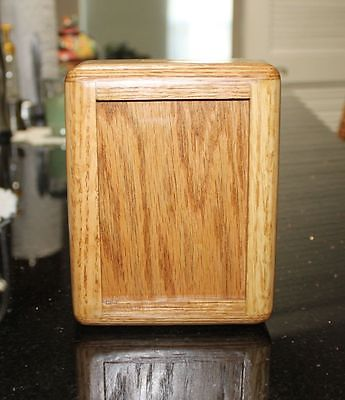

In [ ]:
pil_img = Image(filename=train_data[image_col_1][5])
display(pil_img)

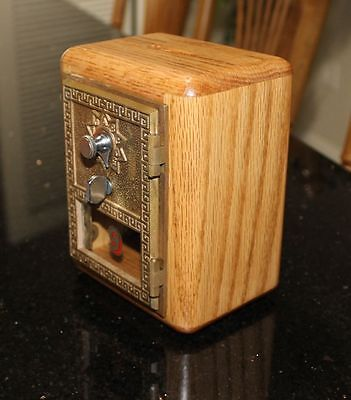

In [ ]:
pil_img = Image(filename=train_data[image_col_2][5])
display(pil_img)

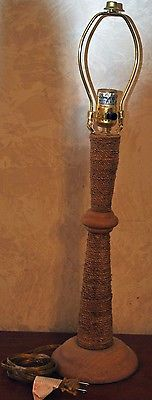

In [ ]:

pil_img = Image(filename=train_data[image_col_1][0])
display(pil_img)

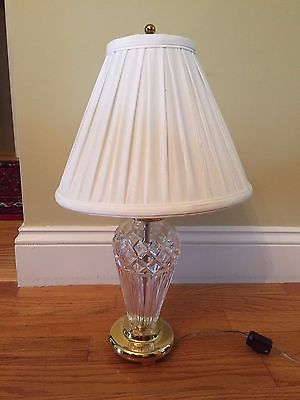

In [ ]:
pil_img = Image(filename=train_data[image_col_2][0])
display(pil_img)

In [ ]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.3.1
Uninstalling torch-2.3.1:
  Successfully uninstalled torch-2.3.1
Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1
Found existing installation: torchaudio 2.4.0+cu121
Uninstalling torchaudio-2.4.0+cu121:
  Successfully uninstalled torchaudio-2.4.0+cu121


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires torch<2.4,>=2.2, but you have torch 2.4.1+cpu which is incompatible.
autogluon-multimodal 1.1.1 requires torchvision<0.19.0,>=0.16.0, but you have torchvision 0.19.1+cpu which is incompatible.


In [ ]:
from autogluon.multimodal import MultiModalPredictor
predictor = MultiModalPredictor(
        problem_type="image_similarity",
        query=image_col_1, # the column name of the first image
        response=image_col_2, # the column name of the second image
        label=label_col, # the label column name
        match_label=match_label, # the label indicating that query and response have the same semantic meanings.
        eval_metric='auc', # the evaluation metric
    )

# Fit the model
predictor.fit(
    train_data=train_data,
    time_limit=120,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240919_050517"
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.4.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       10.72 GB / 12.67 GB (84.6%)
Disk Space Avail:   61.26 GB / 107.72 GB (56.9%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume yo

model.safetensors:   0%|          | 0.00/395M [00:00<?, ?B/s]

GPU Count: 0
GPU Count to be Used: 0

INFO: GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO: 
  | Name              | Type                            | Params | Mode 
------------------------------------------------------------------------------
0 | query_model       | TimmAutoModelForImagePrediction | 93.3 M | train
1 | response_model    | TimmAutoModelForImagePrediction | 93.3 M | train
2 | validation_metric | BinaryAUROC                     | 0      | train
3 | loss_func         | ContrastiveLoss                 | 0      | train
4 | miner_func        | PairMarginMiner                 | 0      | train
------------------------------------------------------------------------------
93.3 M    Trainable params
0         Non-trainable params
93.3 M    Total params
373.248   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Time limit reached. Elapsed time is 0:02:19. Signaling Trainer to stop.


Validation: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20240919_050517")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




In [ ]:
score = predictor.evaluate(test_data)
print("evaluation score: ", score)

Predicting: |          | 0/? [00:00<?, ?it/s]

evaluation score:  {'roc_auc': 0.7569273259537668}


In [ ]:
pred = predictor.predict(test_data.head(3))
print(pred)

Predicting: |          | 0/? [00:00<?, ?it/s]

0    1
1    1
2    1
Name: Label, dtype: int64


In [ ]:
proba = predictor.predict_proba(test_data.head(3))
print(proba)

Predicting: |          | 0/? [00:00<?, ?it/s]

          0         1
0  0.243824  0.756176
1  0.025426  0.974574
2  0.064507  0.935493


In [ ]:
embeddings_1 = predictor.extract_embedding({image_col_1: test_data[image_col_1][:5].tolist()})
print(embeddings_1.shape)
embeddings_2 = predictor.extract_embedding({image_col_2: test_data[image_col_2][:5].tolist()})
print(embeddings_2.shape)

Predicting: |          | 0/? [00:00<?, ?it/s]

(5, 768)


Predicting: |          | 0/? [00:00<?, ?it/s]

(5, 768)
